<a href="https://colab.research.google.com/github/lucaricciatl/NeuralNetworkExamples/blob/main/AutoregressiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

N= 200
A = 12
SNR= 0.2
w1 = 1
w2 = 0.9
T = 25
W = A*SNR*np.random.random(N)
x = np.linspace(-50, 50, N)
y = A*(np.sin(w1*x)+np.sin(w2*x))
yr = A*(np.sin(w1*x)+np.sin(w2*x))+W
print(x)
print(y)
print(W)

[-50.         -49.49748744 -48.99497487 -48.49246231 -47.98994975
 -47.48743719 -46.98492462 -46.48241206 -45.9798995  -45.47738693
 -44.97487437 -44.47236181 -43.96984925 -43.46733668 -42.96482412
 -42.46231156 -41.95979899 -41.45728643 -40.95477387 -40.45226131
 -39.94974874 -39.44723618 -38.94472362 -38.44221106 -37.93969849
 -37.43718593 -36.93467337 -36.4321608  -35.92964824 -35.42713568
 -34.92462312 -34.42211055 -33.91959799 -33.41708543 -32.91457286
 -32.4120603  -31.90954774 -31.40703518 -30.90452261 -30.40201005
 -29.89949749 -29.39698492 -28.89447236 -28.3919598  -27.88944724
 -27.38693467 -26.88442211 -26.38190955 -25.87939698 -25.37688442
 -24.87437186 -24.3718593  -23.86934673 -23.36683417 -22.86432161
 -22.36180905 -21.85929648 -21.35678392 -20.85427136 -20.35175879
 -19.84924623 -19.34673367 -18.84422111 -18.34170854 -17.83919598
 -17.33668342 -16.83417085 -16.33165829 -15.82914573 -15.32663317
 -14.8241206  -14.32160804 -13.81909548 -13.31658291 -12.81407035
 -12.31155

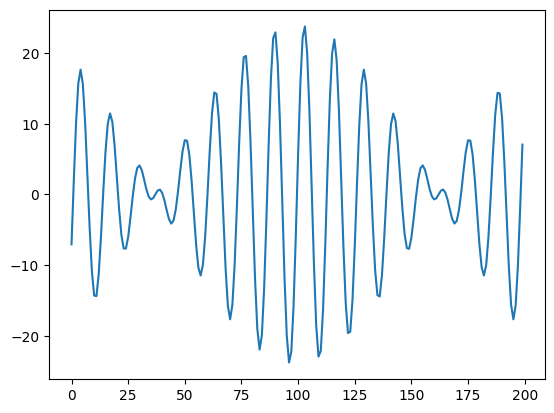

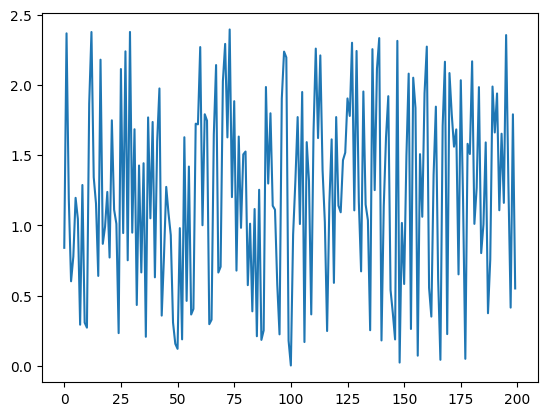

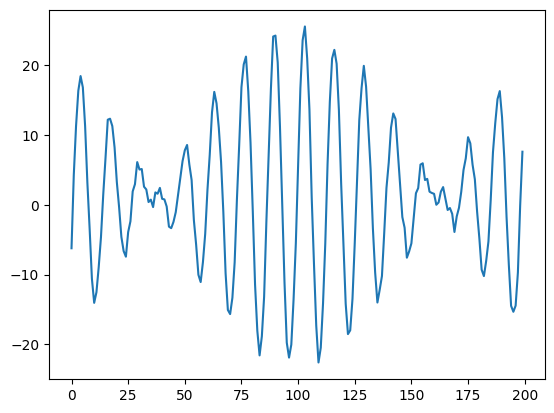

In [209]:
plt.figure(1)
plt.plot(y);
plt.figure(2)
plt.plot(W)
plt.figure(3)
plt.plot(yr);

In [210]:

X=[]
Y=[]
for t in range(len(x)-T):
  X.append(yr[t:t+T])
  Y.append(yr[t+T])
X=np.asarray(X).reshape(-1,T)
Y=np.asarray(Y)
n = len(X)
print(X.shape)
print(Y.shape)
print(n)

(175, 25)
(175,)
175


In [211]:
inputL = Input(shape=(T,))
dense1L = Dense(1)(inputL)

model = Model(inputL,dense1L)

model.compile(loss="mse",optimizer=Adam(learning_rate=0.1))

r = model.fit(
    X[:-n//2],Y[:-n//2],
    epochs = 100,
    validation_data = (X[-n//2:],Y[-n//2:])
)

Epoch 1/100
3/3 [==============================] - 1s 74ms/step - loss: 199.2797 - val_loss: 277.2596
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 103.3849 - val_loss: 34.1894
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 73.7685 - val_loss: 25.4561
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 31.6645 - val_loss: 48.0462
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 32.7549 - val_loss: 26.7411
Epoch 6/100
3/3 [==============================] - 0s 92ms/step - loss: 10.0415 - val_loss: 9.2227
Epoch 7/100
3/3 [==============================] - 0s 60ms/step - loss: 16.4152 - val_loss: 11.0047
Epoch 8/100
3/3 [==============================] - 0s 32ms/step - loss: 5.2800 - val_loss: 6.3965
Epoch 9/100
3/3 [==============================] - 0s 20ms/step - loss: 10.6468 - val_loss: 4.2464
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 4.0716 - val_loss: 12.5371
E

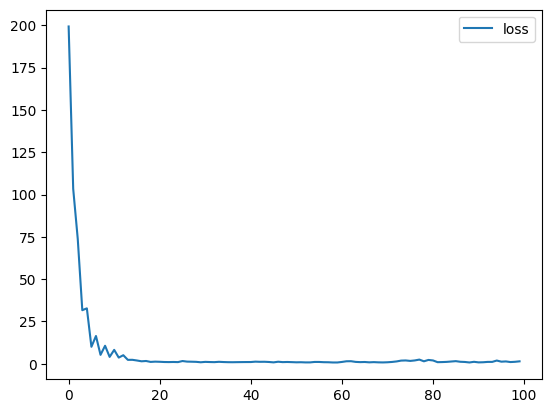

In [212]:
plt.figure(4)
plt.plot(r.history['loss'],label='loss')
plt.legend();

In [ ]:
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]

while len(validation_prediction) < len(validation_target):
    prediction = model.predict(last_x.reshape(1,-1))[0,0] 
    validation_prediction.append(prediction)
    last_x = np.roll(last_x,-1)
    last_x[-1] = prediction

1/1 [==============================] - ETA: 0s

In [ ]:
plt.plot(validation_target, label = "target")
plt.plot(validation_prediction, label = "prediction")
plt.legend()